# Masks Study

#### This code aims to create an overview of the mask sales performance over time.

Mindful Mom Art is an online store that sells reusable goods for families. The store was founded in late December 2019.
The store took off around March/April as the first Etsy store to offer masks when the pandemic hit.
This study aims to create a data visualization of how the mask products impacted the store.
The study is divided into two categories. The first one is an overview of the year 2020 from January to July 15th.
The second one is an overview from June to July 15th, 2020.
After April, when the pandemic curve began to flatten, there were changes in the market that can be clearly visualized in the graphs plotted here.

Let's begin our endeavor...

In [1]:
# Let's import the libraries used in this study
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's read the csv data that is ready to analysis and save in a dataframe named df
df = pd.read_csv('DataCleaned.csv', parse_dates = ['Sale Date', 'Date Paid', 'Date Shipped'], index_col=[0])

In [3]:
# Let's reduce the size of the Dataframe to save space in the disk
df["Item Name"] = df["Item Name"].astype("category")
df["Ship State"] = df["Ship State"].astype("category")
df["Ship Country"] = df["Ship Country"].astype("category")
df["Variations"] = df["Variations"].astype("category")
df["Item Type"] = df["Item Type"].astype("category")
df["Quantity"] = df["Quantity"].astype("int")

### Mask Dataframe & Mask Dataframe Period of Time

In [4]:
# Let's create a specific dataframe from df for the masks only named df_mask
df_mask = df[df['Item Type'] == 'Mask']

In [5]:
# From df_mask, let's define the period of time from start to finish which we want to study named df_maskp
start = '2020-06-01' # From June
stop = '2020-07-31' # To July
df_maskp = df_mask[df_mask['Sale Date'].between(start, stop)]

In [6]:
# Let's create a new dataframe from df for only the period of time that we decided to study named dfp
dfp = df[df['Sale Date'].between(start, stop)]

## Comparing the percentage of masks and other items sold

#### In this section let's compare the percentage of masks sold with the other items sold in the store. 
There are two plots in this section, one from January to July and another one from June to July.

### From January to July

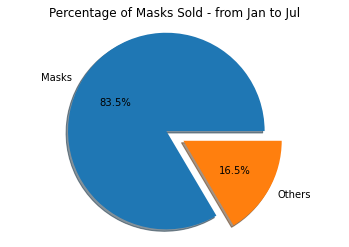

In [7]:
# Let's create a pie chart to compare the percentages
labels = 'Masks', 'Others'
sizes = [len(df_mask)/len(df), 1-len(df_mask)/len(df)]
explode = (0.1, 0.1) 
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
ax.axis('equal')  
ax.set_title('Percentage of Masks Sold - from Jan to Jul')
plt.show()


### From June to July

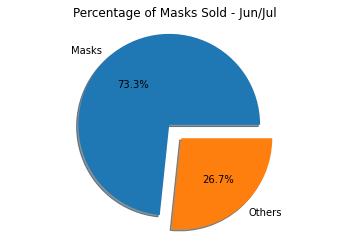

In [8]:
# Pie chart 
labels = 'Masks', 'Others'
sizes = [len(df_maskp)/len(dfp), 1-len(df_maskp)/len(dfp)]
explode = (0.1, 0.1) 
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
ax.axis('equal')  
ax.set_title('Percentage of Masks Sold - Jun/Jul')
plt.show()

## Comparing the Number of Masks Sold

#### In this section let's compare the number of masks sold with the other items sold in the store. 
There are two plots in this section, one from January to July and another one from June to July.

### From January to July

Text(0.5, 0.98, 'Number of Items Sold - from January to July')

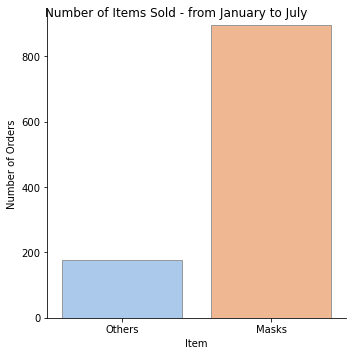

In [9]:
# Let's plot the number of items sold divided by two groups: masks and others
g = sns.catplot(x=['Others', 'Masks'], y = [len(df)-len(df_mask), len(df_mask)], kind="bar",
            palette="pastel", edgecolor=".6",
            data=pd.DataFrame({'Mask':len(df_mask), 'Others':(len(df)-len(df_mask))}, 
                              index = ['Number of Orders']))
g.set_axis_labels('Item','Number of Orders'),
g.set_axis_labels('Item'),
g.fig.suptitle('Number of Items Sold - from January to July')
  

### From June to July

Text(0.5, 0.98, 'Number of Items Sold - Jun/Jul')

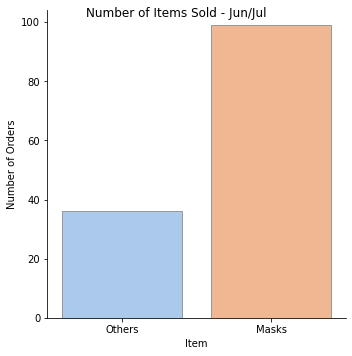

In [10]:
# Let's plot the number of items sold divided by two groups: masks and others
g = sns.catplot(x=['Others', 'Masks'], y = [len(dfp)-len(df_maskp), len(df_maskp)], kind="bar",
            palette="pastel", edgecolor=".6",
            data=pd.DataFrame({'Mask':len(df_mask), 'Others':(len(dfp)-len(df_maskp))}, 
                              index = ['Number of Orders']))
g.set_axis_labels('Item','Number of Orders'),
g.set_axis_labels('Item'),
g.fig.suptitle('Number of Items Sold - Jun/Jul')

## Sizes Sold

#### This section shows the percentage of mask's sizes sold. 
There are four mask sizes: Toddlers, kids, Teens and Adults.

### From January to July

In [11]:
# Let's create a Series with only the size of the masks and the number of items sold for each size.
df_mask_var = df_mask['Variations'].value_counts().head(4)
df_mask_var

Adults      711
Toddlers     66
Kids         63
Teens        56
Name: Variations, dtype: int64

In [12]:
# Let's define some parameters used in the plot
n_total = df_mask_var.sum()
n_adults = df_mask_var['Adults']
n_teens = df_mask_var['Teens']
n_kids = df_mask_var['Kids']
n_toddlers = df_mask_var['Toddlers']

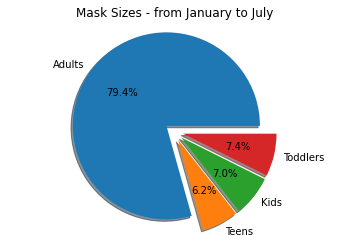

In [13]:
# Let's create the pie chart with the Sizes Sold for all time
labels = 'Adults', 'Teens', 'Kids', 'Toddlers'
sizes = [n_adults/n_total, n_teens/n_total, n_kids/n_total, n_toddlers/n_total,]
explode = (0.1, 0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Mask Sizes - from January to July')
plt.show()

### From June to July

In [14]:
# Let's create a Series with only the size of the masks and the number of items sold for each size.
df_mask_var = df_maskp['Variations'].value_counts().head(4)

In [15]:
# Let's define some parameters used in the plot
n_total = df_mask_var.sum()
n_adults = df_mask_var['Adults']
n_teens = df_mask_var['Teens']
n_kids = df_mask_var['Kids']
n_toddlers = df_mask_var['Toddlers']

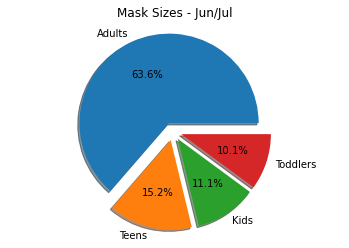

In [16]:
# Let's create the pie chart with the Sizes Sold for all time
labels = 'Adults', 'Teens', 'Kids', 'Toddlers'
sizes = [n_adults/n_total, n_teens/n_total, n_kids/n_total, n_toddlers/n_total,]
explode = (0.1, 0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Mask Sizes - Jun/Jul')
plt.show()

## States Shipped

#### In this section we can evaluate the top five states where the masks were ordered.

### From January to July

In [17]:
# Let's start with a Series with the top 5 states and their respective number of orders
df_state = df_mask['Ship State'].value_counts().head(5)
df_state.sort_values(ascending=True, inplace=True)
df_state

MA     43
TX     49
NY     64
CA    116
VA    165
Name: Ship State, dtype: int64

Text(0.5, 1.0, 'Number of Order per State - from January to July')

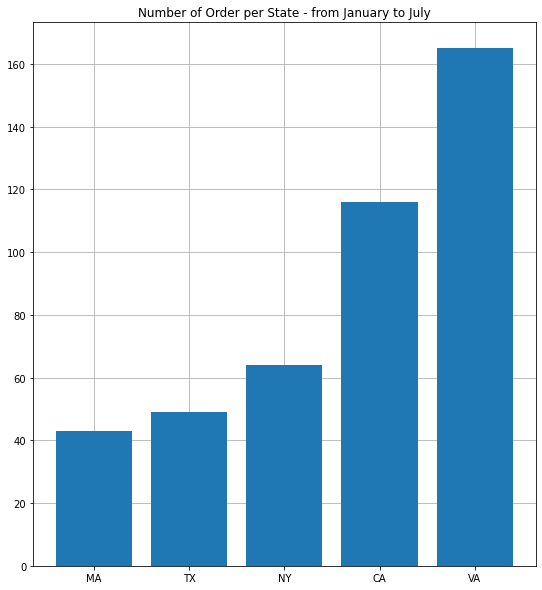

In [18]:
# Let's plot a bar chart with the number of orders from the top 5 states
names = df_state.index
values = df_state

fig, ax = plt.subplots(figsize=(9, 10), sharey=True)
ax.grid(zorder=0)
ax.bar(names, values, zorder = 3)
ax.set_title('Number of Order per State - from January to July')

### From June to July

In [19]:
# Let's start with a Series with the top 5 states and their respective number of orders
df_state = df_maskp['Ship State'].value_counts().head(5)
df_state.sort_values(ascending=True, inplace=True)
df_state

MA     5
WA     6
CA    11
FL    14
VA    23
Name: Ship State, dtype: int64

Text(0.5, 1.0, 'Number of Order per State - Jun/Jul')

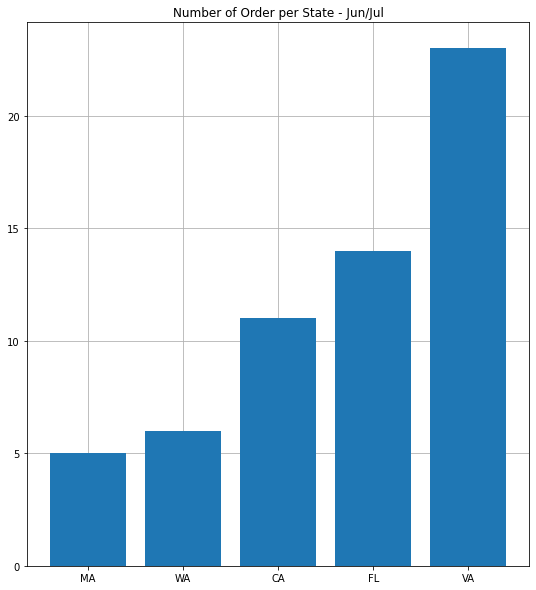

In [20]:
# Let's plot a bar chart with the number of orders from the top 5 states
names = df_state.index
values = df_state

fig, ax = plt.subplots(figsize=(9, 10), sharey=True)
ax.grid(zorder=0)
ax.bar(names, values, zorder = 3)
ax.set_title('Number of Order per State - Jun/Jul')

## The most popular mask pattern

#### There are several patterns available for the masks. But there are some patterns preferences from the customers... 
Let's study the most eight popular mask patterns in this section.

### From January to July

In [21]:
# Let's start by creating a dataframe with the most eight popular masks.
n = 8 # Rank of the most popular mask pattern analyzed
df_pattern = df_mask['Item Name'].value_counts().head(n)
df_pattern.index = df_pattern.index.str.split('-')
df_pattern.head(3)

[Mask ,  Dark Green]     88
[Mask ,  Music Notes]    85
[Mask ,  Sketch Art]     68
Name: Item Name, dtype: int64

In [22]:
# Let's select only the pattern name of the masks
index_list = []
for i in range(0,len(df_pattern.index)):
    index_list.append(df_pattern.index[i][1].strip())
df_pattern.index = index_list

Text(0.5, 1.0, 'Number of Masks Ordered per Pattern - From January to July')

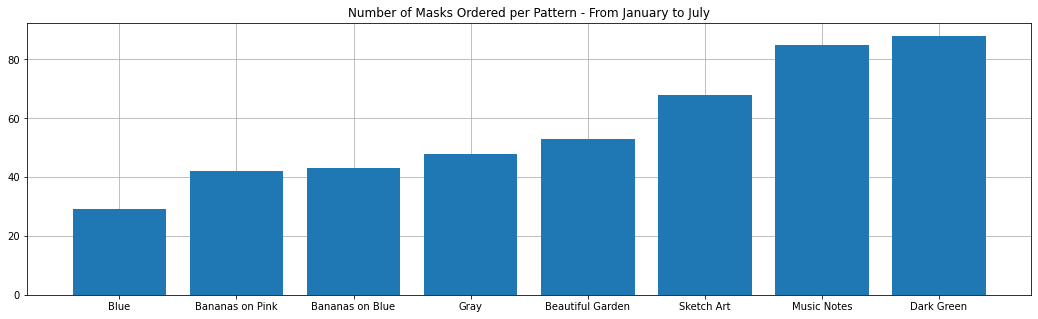

In [23]:
# Let's plot our bar chart
df_pattern.sort_values(ascending=True, inplace=True)
names = df_pattern.index
values = df_pattern

fig, ax = plt.subplots(figsize=(18, 5), sharey=True)
ax.grid(zorder=0)
ax.bar(names, values, zorder=3)
ax.set_title('Number of Masks Ordered per Pattern - From January to July')

### From June to July

In [24]:
# Let's start by creating a dataframe with the most eight popular masks.
n = 8 # Rank of the most popular mask pattern analyzed
df_pattern = df_maskp['Item Name'].value_counts().head(n)
df_pattern.index = df_pattern.index.str.split('-')

In [25]:
# Let's select only the pattern name of the masks
index_list = []
for i in range(0,len(df_pattern.index)):
    index_list.append(df_pattern.index[i][1].strip())
df_pattern.index = index_list

Text(0.5, 1.0, 'Number of Masks Ordered per Pattern - Jun/Jul')

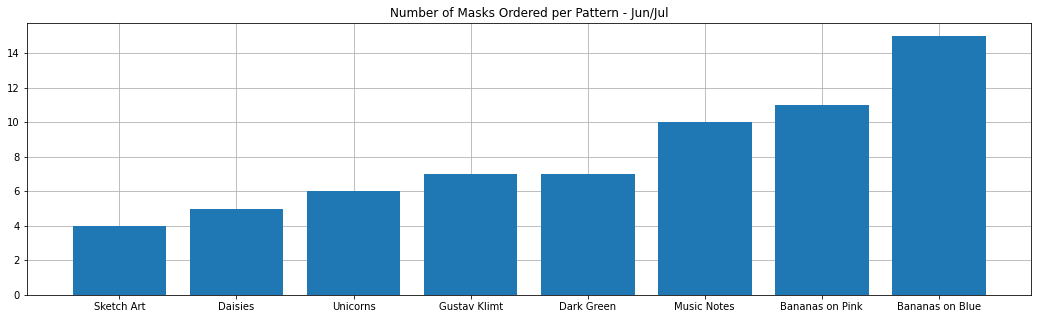

In [26]:
# Let's plot our bar chart
df_pattern.sort_values(ascending=True, inplace=True)
names = df_pattern.index
values = df_pattern

fig, ax = plt.subplots(figsize=(18, 5), sharey=True)
ax.grid(zorder=0)
ax.bar(names, values, zorder=3)
ax.set_title('Number of Masks Ordered per Pattern - Jun/Jul')

## Processing Shipping Time

#### This section evaluates the processing time from the time the ordered was place to the time it has being shipped.

### from January to July

In [27]:
# Lets Create a Series with the processing shipping time and the number of orders
df_mask_dt = (df_mask['Date Shipped']-df_mask['Date Paid']).dropna().value_counts()
df_mask_dt

1 days    382
0 days    228
2 days    213
3 days     41
4 days     21
5 days      3
dtype: int64

In [28]:
# Let's define some variables used in the plot
n_total = df_mask_dt.sum()
n_0days = df_mask_dt['0 days']
n_1days = df_mask_dt['1 days']
n_2days = df_mask_dt['2 days']
n_3days = df_mask_dt['3 days']
n_45days = df_mask_dt['4 days']+df_mask_dt['5 days']

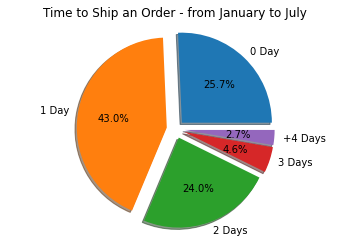

In [29]:
# Let's create a pie chart with the percentage of the processing shipping time from 0 to +4 days
labels = '0 Day', '1 Day', '2 Days', '3 Days', '+4 Days'
sizes = [n_0days/n_total, n_1days/n_total, n_2days/n_total, n_3days/n_total, n_45days/n_total]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Time to Ship an Order - from January to July')
plt.show()

### from June to July

In [30]:
# Lets Create a Series with the processing shipping time and the number of orders
df_mask_dt = (df_maskp['Date Shipped']-df_maskp['Date Paid']).dropna().value_counts()
df_mask_dt

2 days    40
4 days    21
1 days    19
3 days     6
5 days     3
0 days     2
dtype: int64

In [31]:
# Let's define some variables used in the plot
n_total = df_mask_dt.sum()
n_0days = df_mask_dt['0 days']
n_1days = df_mask_dt['1 days']
n_2days = df_mask_dt['2 days']
n_3days = df_mask_dt['3 days']
n_45days = df_mask_dt['4 days']+df_mask_dt['5 days']

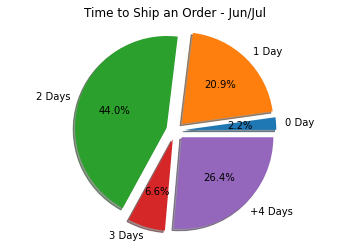

In [32]:
# Let's create a pie chart with the percentage of the processing shipping time from 0 to +4 days
labels = '0 Day', '1 Day', '2 Days', '3 Days', '+4 Days'
sizes = [n_0days/n_total, n_1days/n_total, n_2days/n_total, n_3days/n_total, n_45days/n_total]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Time to Ship an Order - Jun/Jul')
plt.show()

#### We can see that the processing time has increased from June and July if compared to the percentage of processing time from January to July. It seems someone has been a little lazy here or maybe busier?

## Revenue per Item

#### Where does the revenue comes from? From the masks? Pads? Unpaper towels? 
We know so far that the most sold items are masks, but their cost is relatively low if compared to the set of pads for exemple.
Let's analyze in this section where out revenue comes from.

### January to July

In [33]:
# Let's start by evaluating the most sold items
df['Item Type'].value_counts().head(6)

Mask              896
Pads               48
Unpaper Towels     41
Napkins            22
Strap              10
Cotton Pads         9
Name: Item Type, dtype: int64

In [34]:
# Let's create some variables related to the revenue of the most important items sold in the store.
revenue_t = df['Item Total'].sum() #Total Revenue
revenue_m = df_mask['Item Total'].sum() # Mask Revenue
revenue_p = df[df['Item Type'] == 'Pads']['Item Total'].sum() # Pads Revenue
revenue_u = df[df['Item Type'] == 'Unpaper Towels']['Item Total'].sum() # Unpaper Towels Revenue
revenue_o = revenue_t - revenue_m - revenue_p - revenue_u # Others

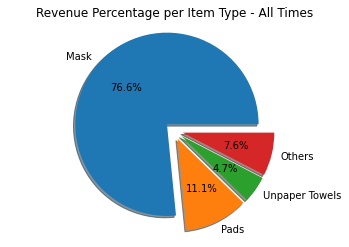

In [35]:
# Let's plot our pie chart with the most significant items
labels = 'Mask', 'Pads', 'Unpaper Towels', 'Others'
sizes = [revenue_m/revenue_t, revenue_p/revenue_t, revenue_u/revenue_t,  revenue_o/revenue_t]
explode = (0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Revenue Percentage per Item Type - All Times')
plt.show()

In [36]:
# Let's quickly analyze the total revenue, mask revenue, pads and also unpaper towels revenue.
dic_revenue = {'Total revenue': [revenue_t],'Mask revenue': [revenue_m], 'Pads revenue': [revenue_p], 'Unpaper Towels revenue': [revenue_u]}
df_revenuep = pd.DataFrame(dic_revenue)
df_revenuep

,Total revenue,Mask revenue,Pads revenue,Unpaper Towels revenue
0,19881.78,15224.5,2210.0,934.0


### June to July

In [37]:
# Let's start by evaluating the most sold items
dfp['Item Type'].value_counts().head(6)

Mask              99
Unpaper Towels    13
Pads               6
Napkins            5
Cotton Rounds      3
Strap              2
Name: Item Type, dtype: int64

In [38]:
# Let's create some variables related to the revenue of the most important items sold in the store.
revenue_t = df['Item Total'].sum() #Total Revenue
revenue_t = dfp['Item Total'].sum()
revenue_m = df_maskp['Item Total'].sum()
revenue_p = dfp[dfp['Item Type'] == 'Pads']['Item Total'].sum()
revenue_u = dfp[dfp['Item Type'] == 'Unpaper Towels']['Item Total'].sum()
revenue_o = revenue_t - revenue_m - revenue_p - revenue_u 

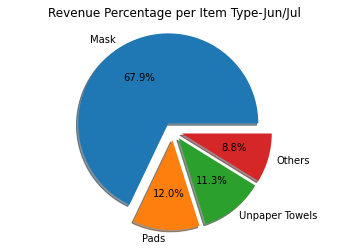

In [39]:
# Let's plot our pie chart with the most significant items
labels = 'Mask', 'Pads', 'Unpaper Towels', 'Others'
sizes = [revenue_m/revenue_t, revenue_p/revenue_t, revenue_u/revenue_t,  revenue_o/revenue_t]
explode = (0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Revenue Percentage per Item Type-Jun/Jul')
plt.show()

In [40]:
# Let's quickly analyze the total revenue, mask revenue, pads and also unpaper towels revenue.
dic_revenue = {'Total revenue': [revenue_t],'Mask revenue': [revenue_m], 'Pads revenue': [revenue_p], 'Unpaper Towels revenue': [revenue_u]}
df_revenuep = pd.DataFrame(dic_revenue)
df_revenuep

,Total revenue,Mask revenue,Pads revenue,Unpaper Towels revenue
0,2384.78,1619.5,285.0,270.0
